# Linear Regression.

## *Profit estimation of companies.*

<img src='https://assets.entrepreneur.com/content/3x2/2000/20170130170703-GettyImages-539953664.jpeg?width=700&crop=2:1' >

In [2]:
# Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
companies = pd.read_csv("1000_companies.csv")
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


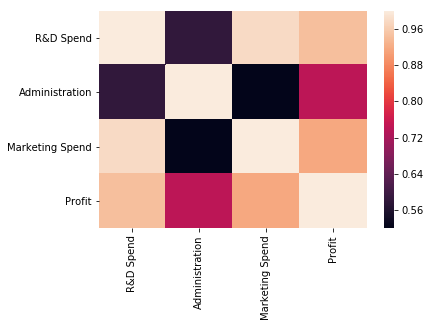

In [5]:
# Data Visualisation
# Building the Correlation matrix

sns.heatmap(companies.corr())

In [6]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
print(X)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0027547e+05 2.4192631e+05
  2.2714282e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2845623e+05 3.2165214e+05
  2.8169232e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6118172e+05 2.7093986e+05
  2.9544217e+05]]


/home/vdhage/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/vdhage/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [8]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [9]:
# Fitting multiple linear regression to the training set
from sklearn.linear_model  import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [11]:
# Calculating the Coefficients
print(regressor.coef_)

[ 5.26235224e+02 -3.54301375e+02 -1.71933849e+02  5.25845857e-01
  8.44390881e-01  1.07574255e-01]


In [12]:
# Calculating the Intercept
print(regressor.intercept_)

-51561.464947753004


In [13]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268807

**R squared value of 0.91 proves the model is a good model.**